# Support Vector Machines - Explaining Hyper Parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/mouse_viral_study.csv")

- Our data is about an experiment on mice. Once the mice are injected with the drug med_1. After 1 week, the med_2 drug is injected. After waiting for 2 weeks, it is checked whether there is still a virus in the mice.
- We will not receive any predictions from our data. Our aim; We will observe what kind of changes hyperparameters make in our data.

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000,400.000,400.000
mean,5.448,5.617,0.500
std,2.319,2.337,0.501
min,1.000,1.000,0.000
25%,3.249,3.431,0.000
50%,5.394,5.638,0.500
75%,7.630,7.783,1.000
max,10.000,10.000,1.000


## Separating Hyperplane Manually

In the graph below, we see that the classes are very well separated from each other:

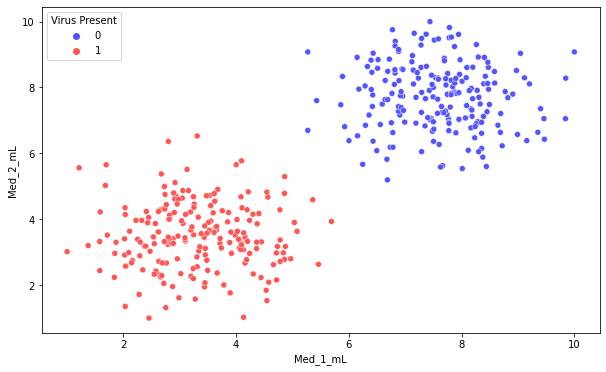

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic');

The purpose of the following function is : 'Draw a linear line where the slope is -1, interception 11.' We gave the x values between 1 and 10 because the med_1 and med_2 columns in the data are between these values.

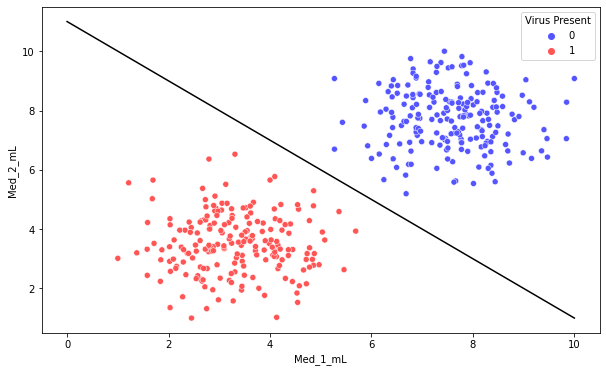

In [7]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black');

## SVM - Support Vector Machine

SVM is a very costly model like KNN. Therefore, it is not possible to observe and give different values to it.

SVM has two types:

1- Support Vector Classification (SVC) : It is used for Classes.

2- Support Vector Machine for Regression (SVR): It is used in continuous data. This method of SVM is not used much because it does not give good results. Models that give much better results in regression are preferred.

Since we want to separate classes in this data, we will use the SVC method.

In [8]:
from sklearn.svm import SVC     

In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

SVC PARAMETERS : 

C --------> It works inversely with the alpha in LinearRegression. With this parameter, we set the tolerance to the error. Default = 1.
(As C gets smaller, its regularization increases. Just like LogisticRegression).

!!!!! Little C saves from overfitting. !!!!!!

Hard Margin if C is greater (overfitting status); If C is small, Soft Margin (underfitting status)

KERNEL -----------> kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},    default = 'rbf'

If the data is not linear, if there is a nested situation within the classes, the appropriate kernel is selected accordingly.

Choosing the model as SVM comes up in the intertwined data. Kernel applies a trick here and moves the data to a higher dimension (1D to 2D or 2D to 3D). In this way, the classes are easily separated from each other.

'rbf' is the most preferred kernel as it gives the best results. 'sigmoid' is mostly used in deep learning models.

To decide which kernel to choose, we will insert our model into GridSearch and it will find the best kernel for us.

DEGREE -------> Butun kernel' lar icin default = 1 olarak gorev yapar. Sadece kernel = 'poly' secildigi anda degree' nin ust degerleri devreye girer ve bu parametre ile oynayabiliriz. Diger butun durumlarda degree = 1' dir.

GAMMA -------> {'scale', 'auto'} or float, default='scale'

It determines the area of the drawn margin. The greater the gamma, the greater the complexity. It is used only for nonlinear data.

!!!!!! In linear data, only the C parameter is checked !!!!!!

!!!!!! In non-linear data, both C and Gamma values are checked. !!!!!!

!!!!!! The error rate is determined with C, and the margin limits are determined with Gamma. We want the smallest possible values of both !!!!!!!

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [10]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

First, we will define our SVC model below and look at our scores with default values:

In [11]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

We have defined a function named svm_margin_plot in another pyton file. We import this function below, which shows the boundaries we have drawn. We will use this function in SVM visualizations (Function content is not important).

In the following import process, we said: "Import the plot_svm_boundary function that I defined from the svm_margin_plot file."

By changing the C and gamma values in the function, we will observe how the drawings change.

In [12]:

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show();

In [13]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

ModuleNotFoundError: No module named 'svm_margin_plot'

- In the image below, the values on the dashed line have been circled; He drew the lines based on these values. These points are called "support".
- The resulting line is called the "hyperline" and is the best distance from the support points.
- The length between two dashed lines is called "margin" and the C value determines this margin range.
- As C gets smaller, the margin increases (i.e. allows error, Soft Margin status).
- !!!! Minimize C, allow error, maximize C, do not allow error !!!!
- As C gets smaller, the regularization (penalty addition) increases, allowing for error.
- In other words, the task of the C parameter here is that by adding bias (error) to the model, we improve the predictions in the test set by worsening the predictions in the train set.

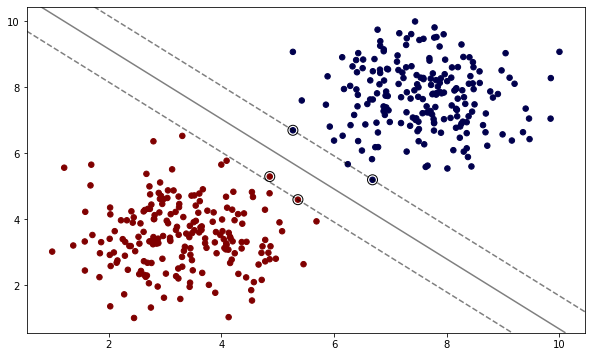

In [14]:
plot_svm_boundary(model,X,y)

!!!!!! The scale process is also very important in this model because it may give too much weight to some features in unbalanced situations. This falsifies our estimates. !!!!!!

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

# 
Note: C and gamma are overfitting parameters

# 

In [15]:
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

In the graph below, when we reduce the C value, we see that the margin range widens and errors are more tolerant (Soft Margin):

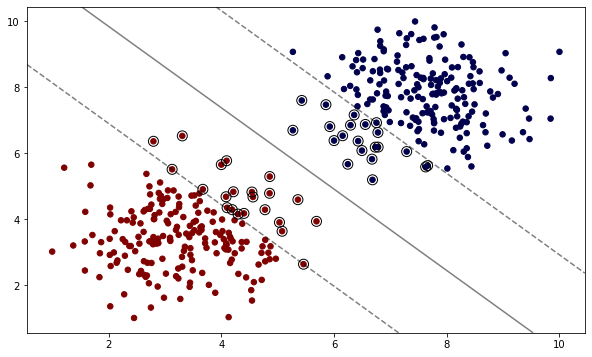

In [16]:
plot_svm_boundary(model,X,y)

### Kernel

Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In the graphic above, we saw how to view linear data with the SVM method. Now let's see how this model is used in nonlinear data below (The data we currently use is linear data, we are looking at the nonlinear situation to see the operation).

First, let's graph it with the default C and gamma values:

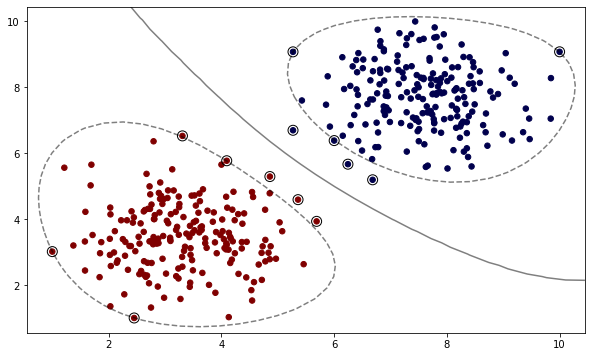

In [32]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model,X,y)

- The gamma value determines the boundaries of the dashed lines above. All areas outside the boundaries drawn by Gamma become 'margin'. Because we have now moved from the 2nd dimension to the 3rd dimension. It means that our model will predict wrongly every point outside the gamma limits.
- The larger the gamma value, the greater the overfitting condition (same as the C value)
- Control is at C unless the gamma is too large. But as the gamma gets bigger, the control shifts to the gamma. In this case, overfitting continues even if the C parameter is large or small. Therefore, it is necessary to find the case where C and gamma balance each other, which GridSearch does for us.
- !!!!!! As C and gamma get smaller, regularization increases !!!!!! (We don't want them to grow too big, if they do, the model goes to overfitting.)

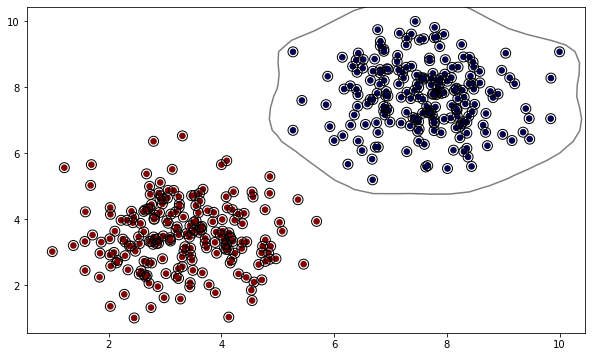

In [17]:
model = SVC(kernel='rbf', C=0.01, gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

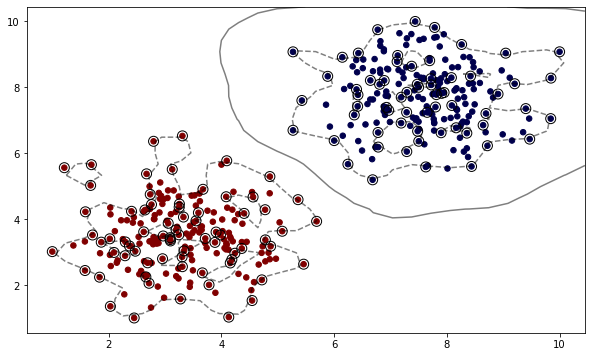

In [18]:
model = SVC(kernel='rbf', C=10, gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

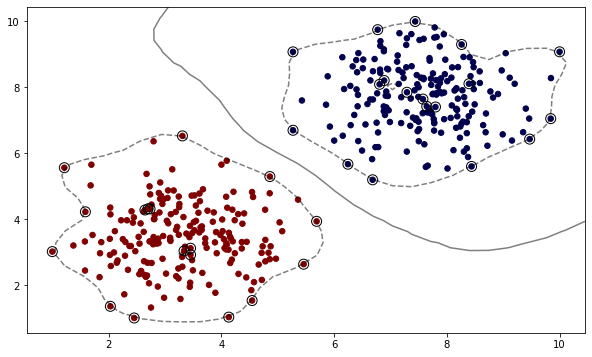

In [19]:
model = SVC(kernel='rbf', C=10, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

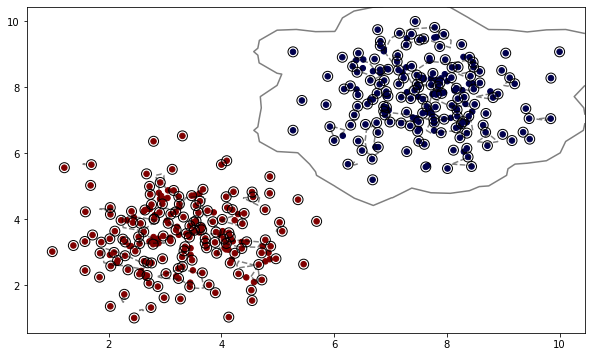

In [20]:
model = SVC(kernel='rbf', C=1, gamma=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

The sigmoid kernel was quite popular for support vector machines due to its origin
from neural networks. Although it is known that the kernel matrix may not be positive
semi-definite (PSD), other properties are not fully studied. In this paper, we discuss
such non-PSD kernels through the viewpoint of separability. Results help to validate
the possible use of non-PSD kernels. One example shows that the sigmoid kernel matrix
is conditionally positive definite (CPD) in certain parameters and thus are valid kernels
there. However, we also explain that the sigmoid kernel is not better than the RBF kernel
in general

Let's observe the results by replacing the default kernel value "rbf" with "sigmoid":

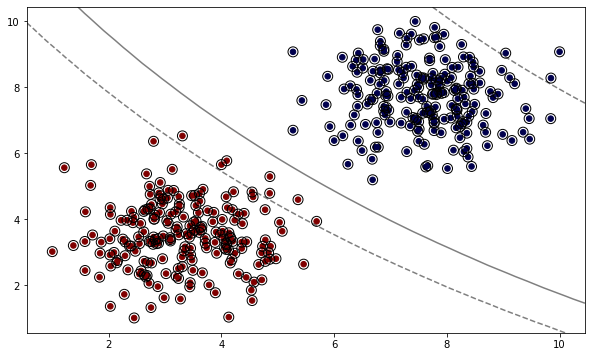

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

I see Sigmoid drawing very meaningless lines. This model does not work for us.

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

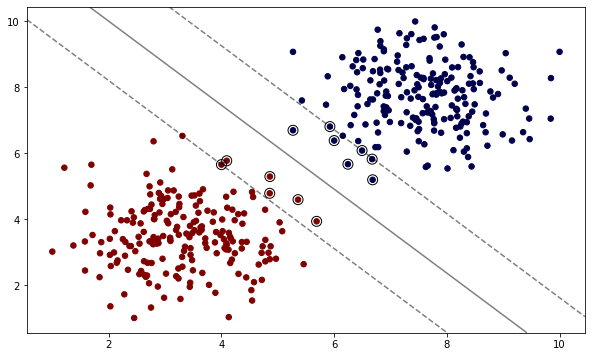

In [22]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

When we chose kernel = 'poly', we could play with degree. We see that the kernel starts to bend as we increase the degree below:

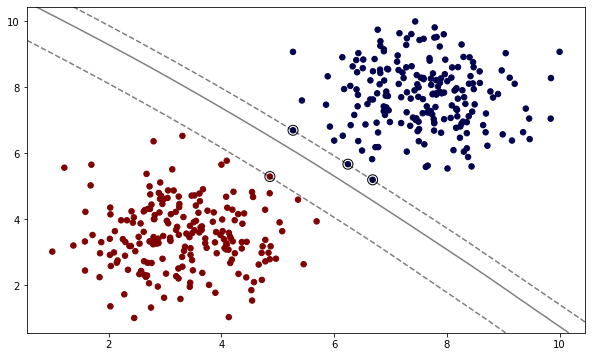

In [23]:
model = SVC(kernel='poly', C=1, degree=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

When the degree got too big, the line disappeared. That's why it's important to adjust the balance of these parameters.

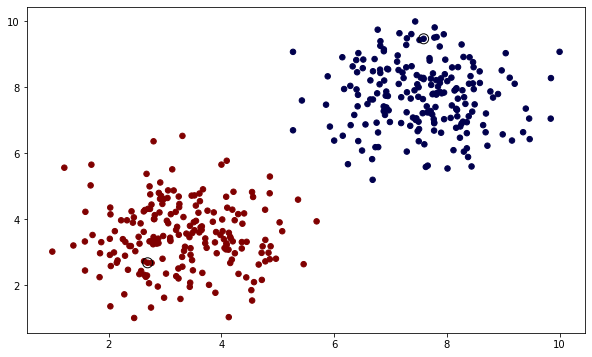

In [24]:
model = SVC(kernel='poly', C=1, degree=100)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [25]:
from sklearn.model_selection import GridSearchCV

We will want GridSearch to try all the possibilities and find the best_scores by defining the C values we want, all the kernel and gamma parameters, and the degree below:

In [26]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [28]:
grid.best_score_

1.0

In [29]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.